# The Dataset 
MNIST 
http://yann.lecun.com/exdb/mnist/


The MNIST dataset consists of images of handwritten digits. I was first introduced to the dataset when I took a course in machine learning and used it to practice with simple algorithms. Later, I learned that this dataset is considered a first step to get familiarized with the field of Computer Vision, an interdisciplinary field that deals with how computers can be made to gain high-level understanding from digital images or videos. From the perspective of engineering, it seeks to automate tasks that the human visual system can do

The size of the images is 28 x 28 pixels with 55,000 images as a training set, 5,000 for cross-validation and 10,000 digits as a  testing set. the images are labeled with their corresponding digit from 0 to 9. Essentially this means we have 10 categories to classify. This can be thought of as a Multi-class Supervised Machine Learning task. 

I will use the popular open-source TensorFlow library to build a Feed-Forward Neural Network as my model of classification. The TensorFlow library comes with a version of this dataset that I will be using for convenience. 


In [1]:
# importing required libraries 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# MNIST Dataset that comes with tensorflow
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Examining the data

Every image in the set is represented by an array of 784 values, each is the color for one pixel. To see what they look like, we reshape it to its recommended size (28 X 28) and plot. 


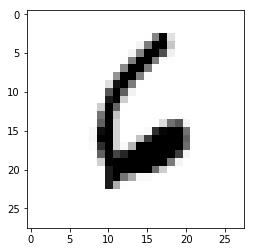

In [2]:
# reshape 
plt.imshow(mnist.train.images[3].reshape(28,28), cmap="Greys");

In [3]:
# checking label of this digi
mnist.train.labels[3]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

### One-hot encoding 
When I loaded the data in the first cell of this notebook, I activated the one_hot enocding parameter to have an array of binary indeices, where 1 reflects the class of one of the digits. 
for example: 

[1,2,3,4,5,6,7,8,9]  <br />
[0,0,0,0,0,0,0,1,0]


### Neural Network: Multi-layer Perceptron 
I'm going to train an MLP as my neural net for this classification task. An MLP is a feedforward Neural Net that can be used for both classification and regression machine learning problems. In its simplist form, it is made up of 3 layers
* Input layer: features
* Hidden layer: hidden units, computation units 
* Output layer: prediction

The hidden layer is made up of hidden units, each computes a non-linear function of the weighted sum of the input features. The MLP computes the weights of these hidden unit values resulting in an output (y). The non-linear function that the hidden units compute is called an activation function, and there are several options for the choice of this function including: Binary step, Hyperbolic tangent function, logistic function and relu function. 

#### Training a  Neural Net: 1 hidden layer of 300 hidden units

In [4]:
# MLP Parameters 
n_input = 784 # number of input pixels for each digit image 
hidden_layer_neurons = 300 
n_classes = 10 # number of digits 

# MLP Training Parameters
learning_rate = 0.005
training_epochs = 30000
batch_size = 50 # mini-batch mode


* An epoch is a single step in training a neural network; when a neural
* network is trained on {every: or batch size} training samples, only in one pass we say that one epoch is finished
* Batch size is a term used in machine learning and refers to the number of training examples used in one iteration.
* Read more about it https://radiopaedia.org/articles/batch-size-machine-learning


### Creating TensorFlow Variables and Model

In short, TensorFlow uses tf.Variable for trainable variables such as weights (W) and biases (B) for the model, while tf.placeholder is used to feed actual training examples.

A critical difference is that with tf.Variable you have to provide an initial value when you declare it. With tf.placeholder you don't have to provide an initial value and you can specify it at run time with the feed_dict argument inside Session.run. Place holders can be thought of as "holes" in the model, like a variable that won't receive its data until a later point. 
For this reason, we must specify the type and bit size for a placeholder. For people moving from traditional machine learning Python libraries like myself, I found some excellent discussions that help clarify these small details, in addition to the excellent TensorFlow documentation. 




https://www.tensorflow.org/guide/variables
https://www.learningtensorflow.com/lesson4/

https://stackoverflow.com/questions/36693740/whats-the-difference-between-tf-placeholder-and-tf-variable

https://stats.stackexchange.com/questions/101560/tanh-activation-function-vs-sigmoid-activation-function

https://stackoverflow.com/questions/37900780/in-tensorflow-what-is-the-difference-between-tf-add-and-operator

https://stackoverflow.com/questions/34300700/use-of-matrix-multiplication-function-in-tensorflow


In [5]:
# x and y placeholders
x = tf.placeholder("float", [None, n_input]) # images_placeholder
y = tf.placeholder("float", [None, n_classes]) # Labels placeholder # why float

* Creating weights and biases 
    * In a Neural Netowrk, Weights are randomly initialized 
* The following code snippet can be thought of as the architecture of the neural net 
* There's one weight between each input and each hidden unit, and one weight between each hidden unit and each output. 

In [6]:
w1 = tf.Variable(tf.random_normal([n_input, hidden_layer_neurons]))
w2 = tf.Variable(tf.random_normal([hidden_layer_neurons, n_classes]))
b1 = tf.Variable(tf.random_normal([hidden_layer_neurons]))
b2 = tf.Variable(tf.random_normal([n_classes]))

In [7]:
# Matrix multiplication: MLP Model
hidden_layer = tf.nn.sigmoid(tf.add(tf.matmul(x, w1), b1))
output_layer = tf.add(tf.matmul(hidden_layer, w2), b2)


### Cost function and Optimizer
* A loss function is a part of a cost function which is a type of an objective function.
    *https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing
* softmax: a wonderful activation function that turns numbers, aka logits into probabilities that sum to one
    * https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d

* The Adam optimizer will be used here to minimize the cost function


__logits__:The vector of raw (non-normalized, we normalize it here with softmax) predictions that a classification model generates, which is then passed to a normalization function. If the model is solving a multi-class classification problem like in this case, logits typically become an input to the softmax function. The softmax function then generates a vector of normalized probabilities with one value for each possible class.

https://stackoverflow.com/questions/17187507/why-use-softmax-as-opposed-to-standard-normalization

* the softmax function reacts to low stimulation (think blurry image) of the neural network with rather uniform distribution, and to high stimulation (ie. large numbers, think crisp image) with probabilities close to 0 and 1.



In [8]:
# Cost funcition and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



* tf.argmax(input, axis=None, name=None, dimension=None)
Returns the index with the largest value across axis of a tensor.

* input is a Tensor and axis describes which axis of the input Tensor to reduce across.

* https://stackoverflow.com/questions/41708572/tensorflow-questions-regarding-tf-argmax-and-tf-equal


In [9]:
# Define the Test model and accuracy
correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
correct_prediction = tf.cast(correct_prediction, "float")
accuracy = tf.reduce_mean(correct_prediction)

#### Now that the model is fully defined, we start a TensorFlow session 
* In short, TF uses a structure called Data Flow Graphs. Computations are executed only after the creation of a session. 
* once a graph / model is fully built, an inner loop is written to do the computations using Run and Eval methods. 


* https://www.tensorflow.org/guide/graphs


In [10]:
# Create a session
sess = tf.InteractiveSession()

# Initialize variables
init = tf.global_variables_initializer()

# Run session
sess.run(init)

In [11]:
# Creating empty arrays, into which we will Append accuracies 

train_accuracies = []
validation_accuracies = []
epoc_iteration = []

# Run the loops and saving the results into the above empty lists 
for epoch in range(training_epochs):    
    batch_x, batch_y = mnist.train.next_batch(batch_size) 
    if (epoch+1) < 100 or (epoch+1) % 100 == 0:
        train_ac = accuracy.eval({x: batch_x, y: batch_y})
        validation_ac = accuracy.eval({x: mnist.validation.images, 
                                       y: mnist.validation.labels})
        
        epoc_iteration.append(epoch+1)
        train_accuracies.append(train_ac)
        validation_accuracies.append(validation_ac)
    sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

### Examing and Plotting the Results 

C:\Users\AdamO\Anaconda3\envs\TensorFlowEnv\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
C:\Users\AdamO\Anaconda3\envs\TensorFlowEnv\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


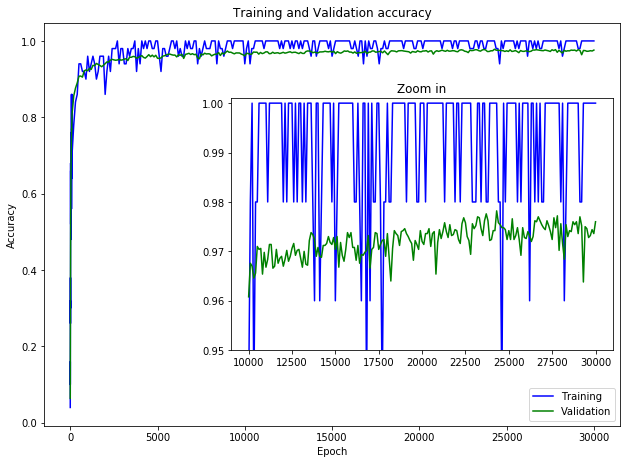

In [12]:
# Creating an empty canvas
fig = plt.figure(figsize=(10,7))
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.36, 0.25, 0.53, 0.5])

# Plot full graph
axes1.plot(epoc_iteration, train_accuracies,'-b', label='Training')
axes1.plot(epoc_iteration, validation_accuracies,'-g', label='Validation')
axes1.legend()
axes1.set_xlabel('Epoch')
axes1.set_ylabel('Accuracy')
axes1.set_title('Training and Validation accuracy')

# Plot zoom in graph
plt.ylim(ymax = 1.001, ymin = 0.95)
axes2.plot(epoc_iteration[198:], train_accuracies[198:],'-b', label='Training')
axes2.plot(epoc_iteration[198:], validation_accuracies[198:],'-g', label='Validation')
axes2.set_title('Zoom in');

* We can observe in the above plot how the weights of the model are changing with each epoch and how the accuracy is increating for both training and validation sets. 

In [13]:
# Printing final accuracies
print("Validation Accuracy:", accuracy.eval({x: mnist.validation.images, y: mnist.validation.labels}))
print("Test Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Validation Accuracy: 0.9752
Test Accuracy: 0.9708


### Conclusion 

The trained model results in 97% accuracy, which is very good for one hidden layer model compared to an advanced model on Kaggle that results in 99.7% on the same dataset. However, the 2.7 % error is considered remarkable in a production application.  


At this point, we can save the weights and biases that resulted from this model to use it for different applications. For example, to create a web app where the user can draw on a JavaScript canvas the digit, and would get a prediction based on it. 

In [1]:
# saving weights and biases between input and hidden layer
theta1 = np.concatenate((b1.eval().reshape(1,300),w1.eval()),axis=0)
np.savetxt("theta1.csv", theta1, delimiter=",")
# saving weights and biases between hidden layer and output

theta2 = np.concatenate((b2.eval().reshape(1,10),w2.eval()),axis=0)
np.savetxt("theta2.csv", theta2, delimiter=",")

NameError: name 'np' is not defined